In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Change Over Time_Corporate Ownership & Owner Occupancy Rates in Boston Neighborhoods.csv')
df = df.drop('own_occ_rate', axis=1)

extrapolated_data = []
for neighborhood in df['Neighborhood'].unique():
    neighborhood_data = df[df['Neighborhood'] == neighborhood]

    # Transform 'corp_own_rate' with the natural logarithm for the exponential model
    X = neighborhood_data[['Year']]
    y = np.log(neighborhood_data['corp_own_rate'])

    model = LinearRegression()
    model.fit(X, y)

    # Predict the ownership rates for the desired years
    target_years = np.array([[2003], [2002], [2001], [2000]])
    log_predicted_values = model.predict(target_years)

    # Transform the predicted values back to the original scale
    predicted_values = np.exp(log_predicted_values)

    for year, value in zip(target_years.flatten(), predicted_values):
        extrapolated_data.append({
            'Year': year,
            'Neighborhood': neighborhood,
            'corp_own_rate': value
        })

extrapolated_df = pd.DataFrame(extrapolated_data)
extrapolated_df = pd.concat([df, extrapolated_df], ignore_index=True)
extrapolated_df

/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/angelyang/.julia/conda/3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/User

Neighborhood  Year  corp_own_rate
0         Allston  2004       0.070000
1         Allston  2005       0.070000
2         Allston  2006       0.080000
3         Allston  2007       0.080000
4         Allston  2008       0.090000
..            ...   ...            ...
520      West End  2000       0.034970
521  West Roxbury  2003       0.009384
522  West Roxbury  2002       0.008376
523  West Roxbury  2001       0.007476
524  West Roxbury  2000       0.006672

[525 rows x 3 columns]

In [3]:
full_census_data = pd.read_csv('Boston_Neighborhood_Census_Data (2000, 2010, 2015, 2017, 2020).csv')
full_census_data.head()

Neighborhood  Year  Population  0-9 years  10-19 years  20-34 years  \
0      Allston  2000       19075      924.0       2907.0      11647.0   
1     Back Bay  2000       16681      491.0       1380.0       7653.0   
2  Beacon Hill  2000        9051      378.0        276.0       4288.0   
3     Brighton  2000       50573     3051.0       2834.0      26560.0   
4  Charlestown  2000       15195     1661.0       1413.0       5043.0   

   35-54 years  55-64 years  65 years and over  less than High School  ...  \
0       2422.0        566.0              609.0                 1603.0  ...   
1       4243.0       1432.0             1482.0                  337.0  ...   
2       2375.0        921.0              814.0                  226.0  ...   
3       9531.0       2657.0             5940.0                 4180.0  ...   
4       4217.0       1218.0             1643.0                 1466.0  ...   

     White  Black/ African American  Hispanic  Asian/PI  Other  \
0  11253.0                      973      2545      3397    907   
1  13870.0                      614       730      1101    366   
2   7904.0                      288       295       442    122   
3  36582.0                     2137      3791      6214   1849   
4  11946.0                      539      1764       761    185   

   Male (Labor Force 16+)  Female (Labor Force 16+)  Occupied Housing Units  \
0                  5790.0                    5480.0                    7292   
1                  6662.0                    5433.0                   10053   
2                  3230.0                    3170.0                    5673   
3                 15722.0                   15670.0                   23213   
4                  4119.0                    4612.0                    7350   

   Owner-occupied  Renter-occupied  
0           709.0           6583.0  
1          3097.0           6956.0  
2          1773.0           3899.0  
3          5271.0          17942.0  
4          3039.0           4311.0  

[5 rows x 24 columns]

In [4]:

census_20 =  full_census_data[full_census_data['Year'] == 2020]
census_17 =  full_census_data[full_census_data['Year'] == 2017]
census_15 =  full_census_data[full_census_data['Year'] == 2015]
census_10 =  full_census_data[full_census_data['Year'] == 2010]
census_00 =  full_census_data[full_census_data['Year'] == 2000]
common_columns = set(census_20.columns) & set(census_17.columns) & set(census_15.columns) & set(census_10.columns) & set(census_00.columns)
common_neighborhoods = set(census_20['Neighborhood'].unique()) & set(census_17['Neighborhood'].unique()) & set(census_15['Neighborhood'].unique()) & set(census_10['Neighborhood'].unique()) & set(census_00['Neighborhood'].unique())
common_neighborhoods

{'Allston',
 'Brighton',
 'Charlestown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Fenway',
 'Hyde Park',
 'Jamaica Plain',
 'Longwood',
 'Mattapan',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South Boston Waterfront',
 'West Roxbury'}

In [5]:
common_columns

{'0-9 years',
 '10-19 years',
 '20-34 years',
 '35-54 years',
 '55-64 years',
 '65 years and over',
 'Asian/PI',
 "Bachelor's Degree or Higher",
 'Black/ African American',
 'Female (Labor Force 16+)',
 'Foreign Born',
 'High School or GED',
 'Hispanic',
 'Male (Labor Force 16+)',
 'Neighborhood',
 'Occupied Housing Units',
 'Other',
 'Owner-occupied',
 'Population',
 'Renter-occupied',
 "Some College or Associate's Degree",
 'White',
 'Year',
 'less than High School'}

In [6]:
census_years = [2020, 2017, 2015, 2010, 2000]
filtered_df = extrapolated_df[extrapolated_df['Year'].isin(census_years)]
filtered_df = filtered_df[filtered_df['Neighborhood'].isin(common_neighborhoods)]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

Neighborhood  Year  corp_own_rate
0                   Allston  2010       0.090000
1                   Allston  2015       0.130000
2                   Allston  2017       0.160000
3                   Allston  2020       0.220000
4                  Brighton  2010       0.070000
..                      ...   ...            ...
70               Roslindale  2000       0.008905
71                  Roxbury  2000       0.050151
72             South Boston  2000       0.031306
73  South Boston Waterfront  2000       0.063243
74             West Roxbury  2000       0.006672

[75 rows x 3 columns]

In [7]:
for neighborhood in common_neighborhoods:
    for year in census_years:
        census_dict = {2000: census_00, 2010: census_10, 2015: census_15, 2017: census_17, 2020: census_20}
        ref = census_dict.get(year)
        for column in common_columns:
            if column not in filtered_df.columns:
                filtered_df[column] = pd.NA
            
            val = ref.loc[ref['Neighborhood'] == neighborhood, column].values[0]
            filtered_df.loc[(filtered_df['Neighborhood'] == neighborhood) & (filtered_df['Year'] == year), column] = val
filtered_df

Neighborhood  Year  corp_own_rate Male (Labor Force 16+)  \
0                   Allston  2010       0.090000                    NaN   
1                   Allston  2015       0.130000                    NaN   
2                   Allston  2017       0.160000                    NaN   
3                   Allston  2020       0.220000                    NaN   
4                  Brighton  2010       0.070000                    NaN   
..                      ...   ...            ...                    ...   
70               Roslindale  2000       0.008905                 7028.0   
71                  Roxbury  2000       0.050151                 7705.0   
72             South Boston  2000       0.031306                 7514.0   
73  South Boston Waterfront  2000       0.063243                  508.0   
74             West Roxbury  2000       0.006672                 7366.0   

   Renter-occupied Some College or Associate's Degree 35-54 years    White  \
0           6828.0                                NaN      2322.0  12808.0   
1           5826.0                             1265.0      1711.0  10494.0   
2           5730.0                             1244.0         NaN   9839.0   
3              NaN                                NaN         NaN  12536.0   
4          17347.0                                NaN      8375.0  36761.0   
..             ...                                ...         ...      ...   
70          5163.0                             4393.0      8632.0  17041.0   
71         12371.0                             5617.0     11387.0   2244.0   
72          8882.0                             4312.0      7840.0  24082.0   
73           406.0                              190.0       458.0   1234.0   
74          4334.0                             4717.0      8548.0  24029.0   

   Other Asian/PI  ... 55-64 years Hispanic Bachelor's Degree or Higher  \
0   1120     4510  ...       768.0     2799                         NaN   
1    801     4200  ...       675.0     2674                      7595.0   
2    926     4811  ...         NaN     2586                      7844.0   
3   1512     6271  ...         NaN     3259                         NaN   
4   1869     7058  ...      3207.0     4641                         NaN   
..   ...      ...  ...         ...      ...                         ...   
70  1057      643  ...      1988.0     4971                      6422.0   
71  3539      370  ...      3029.0     9979                      3213.0   
72   451     1086  ...      2297.0     2199                      5719.0   
73    34       75  ...        96.0       36                       431.0   
74   607     1090  ...      2584.0     1309                      8964.0   

   10-19 years Female (Labor Force 16+) Owner-occupied Occupied Housing Units  \
0       3384.0                      NaN          810.0                   7638   
1       2691.0                      NaN          631.0                   6457   
2       2690.0                      NaN          796.0                   6526   
3          NaN                      NaN            NaN                  10027   
4       3168.0                      NaN         5625.0                  22972   
..         ...                      ...            ...                    ...   
70      3460.0                   7512.0         5429.0                  10592   
71      7254.0                   8958.0         3069.0                  15440   
72      2737.0                   7632.0         4441.0                  13323   
73       102.0                    383.0          301.0                    707   
74      2542.0                   7439.0         7749.0                  12083   

   Foreign Born Black/ African American 20-34 years  
0           NaN                    1075     14451.0  
1        6809.0                    1194     13084.0  
2        1873.0                    1099     13046.0  
3           NaN                    1326         NaN  
4           NaN                  

In [8]:
for column in common_columns:
    if column == 'Neighborhood' or column == 'Year' or column == 'corp_own_rate' or column == 'Population' or column == 'Occupied Housing Units': continue
    filtered_df[column] = filtered_df[column] / filtered_df['Population']
filtered_df

Neighborhood  Year  corp_own_rate Male (Labor Force 16+)  \
0                   Allston  2010       0.090000                    NaN   
1                   Allston  2015       0.130000                    NaN   
2                   Allston  2017       0.160000                    NaN   
3                   Allston  2020       0.220000                    NaN   
4                  Brighton  2010       0.070000                    NaN   
..                      ...   ...            ...                    ...   
70               Roslindale  2000       0.008905               0.251009   
71                  Roxbury  2000       0.050151                0.18123   
72             South Boston  2000       0.031306               0.263307   
73  South Boston Waterfront  2000       0.063243               0.362598   
74             West Roxbury  2000       0.006672               0.256182   

   Renter-occupied Some College or Associate's Degree 35-54 years     White  \
0         0.306024                                NaN     0.10407  0.574041   
1         0.300883                           0.065331    0.088364  0.541961   
2         0.297492                           0.064586         NaN  0.510825   
3              NaN                                NaN         NaN  0.503373   
4         0.329259                                NaN    0.158964  0.697751   
..             ...                                ...         ...       ...   
70        0.184399                           0.156898    0.308297  0.608629   
71         0.29098                           0.132118    0.267835  0.052781   
72        0.311245                           0.151102    0.274731  0.843887   
73        0.289793                           0.135617    0.326909  0.880799   
74        0.150732                           0.164052    0.297291  0.835704   

       Other  Asian/PI  ... 55-64 years  Hispanic Bachelor's Degree or Higher  \
0   0.050197  0.202133  ...    0.034421  0.125448                         NaN   
1   0.041368  0.216909  ...     0.03486  0.138098                    0.392243   
2   0.048076  0.249779  ...         NaN  0.134261                    0.407248   
3   0.060713  0.251807  ...         NaN  0.130863                         NaN   
4   0.035475  0.133966  ...    0.060871   0.08809                         NaN   
..       ...       ...  ...         ...       ...                         ...   
70  0.037751  0.022965  ...    0.071003  0.177542                    0.229365   
71  0.083241  0.008703  ...    0.071245  0.234717                    0.075573   
72  0.015804  0.038056  ...    0.080492  0.077058                    0.200406   
73  0.024268  0.053533  ...    0.068522  0.025696                    0.307637   
74  0.021111  0.037909  ...    0.089869  0.045526                    0.311759   

   10-19 years Female (Labor Force 16+) Owner-occupied Occupied Housing Units  \
0     0.151667                      NaN       0.036303                   7638   
1     0.138976                      NaN       0.032588                   6457   
2      0.13966                      NaN       0.041327                   6526   
3          NaN                      NaN            NaN                  10027   
4     0.060131                      NaN       0.106767                  22972   
..         ...                      ...            ...                    ...   
70    0.123576                 0.268295         0.1939                  10592   
71    0.170622                 0.210702       0.072186                  15440   
72    0.095911                 0.267442       0.155623                  13323   
73    0.072805                 0.273376       0.214847                    707   
74    0.088408                 0.258721       0.269502                  12083   

   Foreign Born Black/ African American 20-34 years  
0           NaN                 0.04818    0.647678  
1       0.35165                0.061664    0.675722  
2      0.097243                0.057058    0.677327  
3  

In [9]:
filtered_df[filtered_df['Neighborhood'] == 'Allston']

Neighborhood  Year  corp_own_rate Male (Labor Force 16+) Renter-occupied  \
0       Allston  2010       0.090000                    NaN        0.306024   
1       Allston  2015       0.130000                    NaN        0.300883   
2       Allston  2017       0.160000                    NaN        0.297492   
3       Allston  2020       0.220000                    NaN             NaN   
60      Allston  2000       0.046145               0.303539        0.345111   

   Some College or Associate's Degree 35-54 years     White     Other  \
0                                 NaN     0.10407  0.574041  0.050197   
1                            0.065331    0.088364  0.541961  0.041368   
2                            0.064586         NaN  0.510825  0.048076   
3                                 NaN         NaN  0.503373  0.060713   
60                           0.059135    0.126972  0.589934  0.047549   

    Asian/PI  ... 55-64 years  Hispanic Bachelor's Degree or Higher  \
0   0.202133  ...    0.034421  0.125448                         NaN   
1   0.216909  ...     0.03486  0.138098                    0.392243   
2   0.249779  ...         NaN  0.134261                    0.407248   
3   0.251807  ...         NaN  0.130863                         NaN   
60  0.178087  ...    0.029672  0.133421                    0.247235   

   10-19 years Female (Labor Force 16+) Owner-occupied Occupied Housing Units  \
0     0.151667                      NaN       0.036303                   7638   
1     0.138976                      NaN       0.032588                   6457   
2      0.13966                      NaN       0.041327                   6526   
3          NaN                      NaN            NaN                  10027   
60    0.152398                 0.287287       0.037169                   7292   

   Foreign Born Black/ African American 20-34 years  
0           NaN                 0.04818    0.647678  
1       0.35165                0.061664    0.675722  
2      0.097243                0.057058    0.677327  
3           NaN                0.053244         NaN  
60     0.338506                0.051009     0.61059  

[5 rows x 25 columns]

In [21]:
# def calculate_correlations(group):
#     group = group.drop(['Neighborhood', 'Year'], axis=1)
#     correlations = group.corrwith(group['corp_own_rate']).drop('corp_own_rate')
#     return correlations

# correlation_df = filtered_df.groupby('Neighborhood').apply(calculate_correlations).unstack()
# print(correlation_df.head())

# Load the Excel file
file_path = 'correlations.xlsx'
correlation_df = pd.read_excel(file_path)

# Fill missing category names to ensure continuity
correlation_df['Unnamed: 0'].fillna(method='ffill', inplace=True)

# Rename columns for clarity
correlation_df.columns = ['Category', 'Neighborhood', 'Correlation']

# Set multi-level index using 'Category' and 'Neighborhood'
correlation_df.set_index(['Category', 'Neighborhood'], inplace=True)

# The DataFrame is now ready and structured
print(correlation_df.head())


                                 Correlation
Category           Neighborhood             
High School or GED Allston         -0.999859
                   Brighton        -0.871039
                   Charlestown     -0.998503
                   Dorchester       0.923452
                   East Boston     -0.535315


In [22]:
correlation_df.to_excel('correlations_3.xlsx', engine='openpyxl')

/var/folders/5z/qh1ybxqd7j9_c2yv8gffcglh0000gn/T/ipykernel_41917/810078475.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed


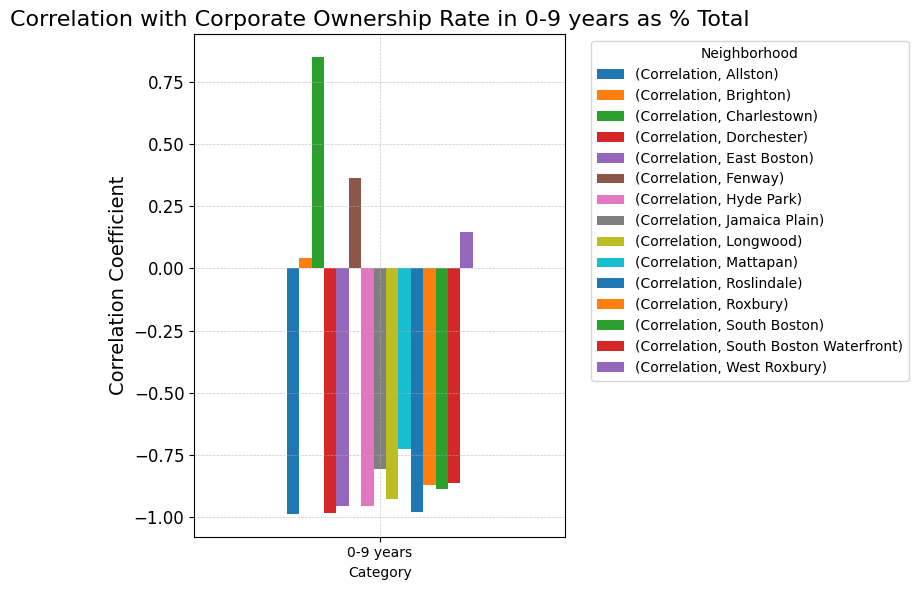

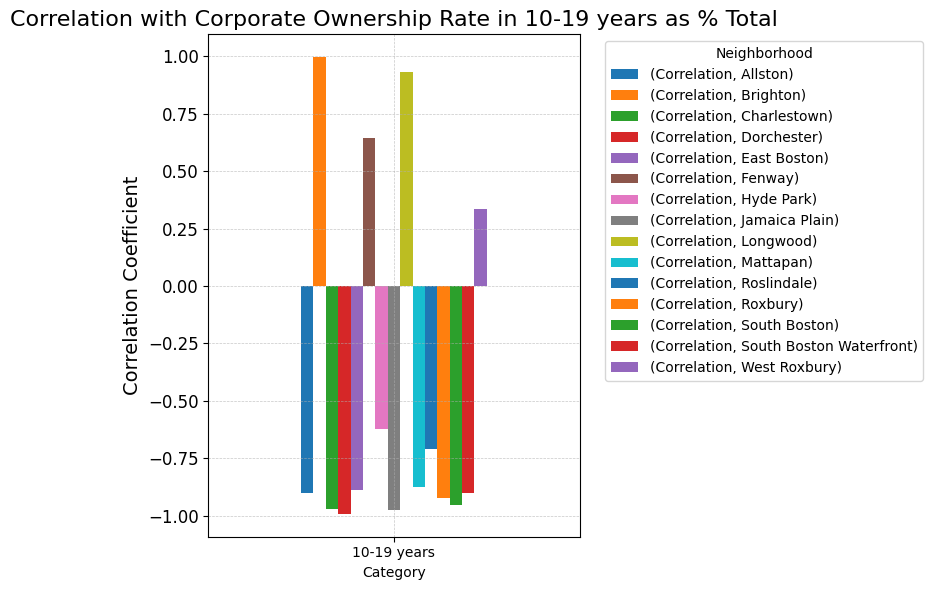

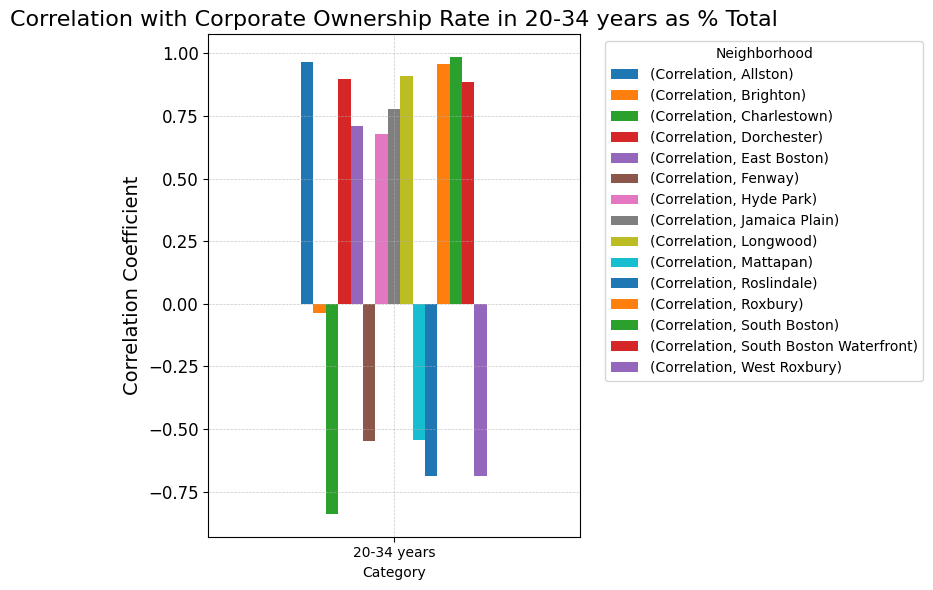

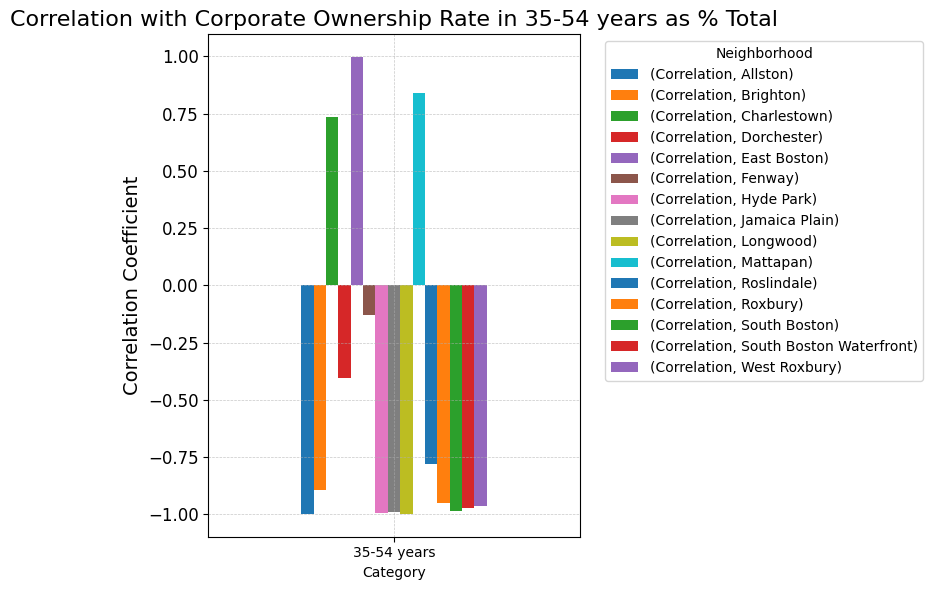

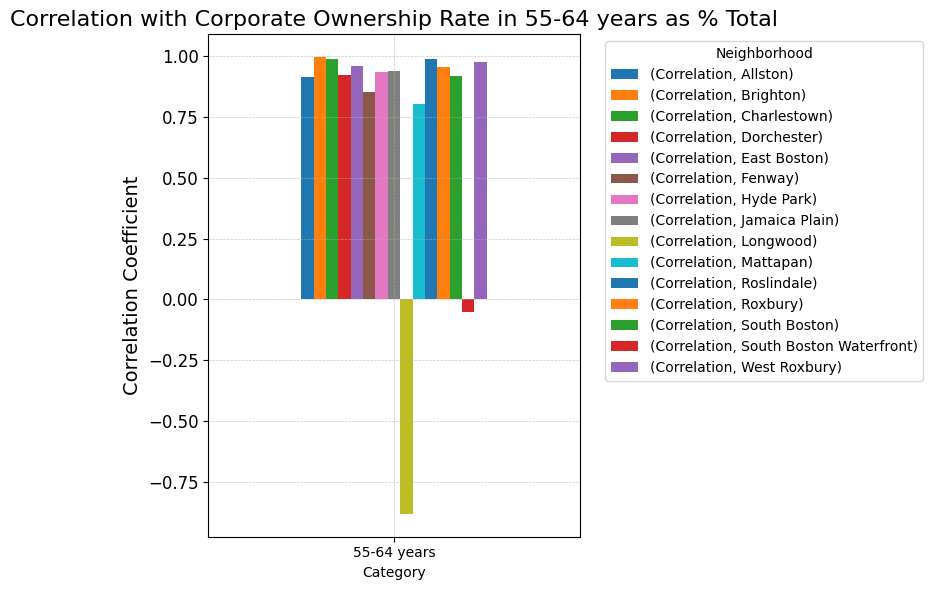

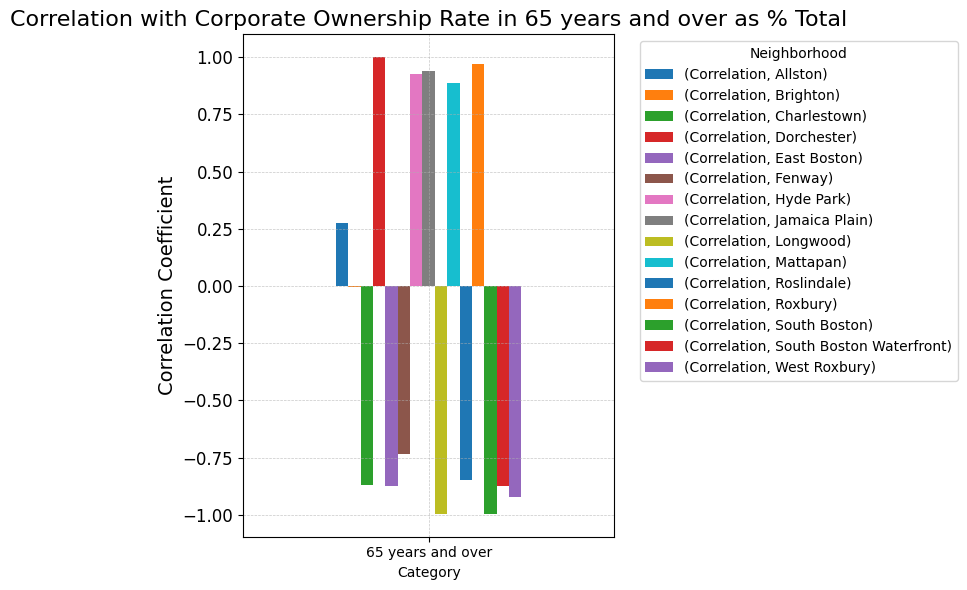

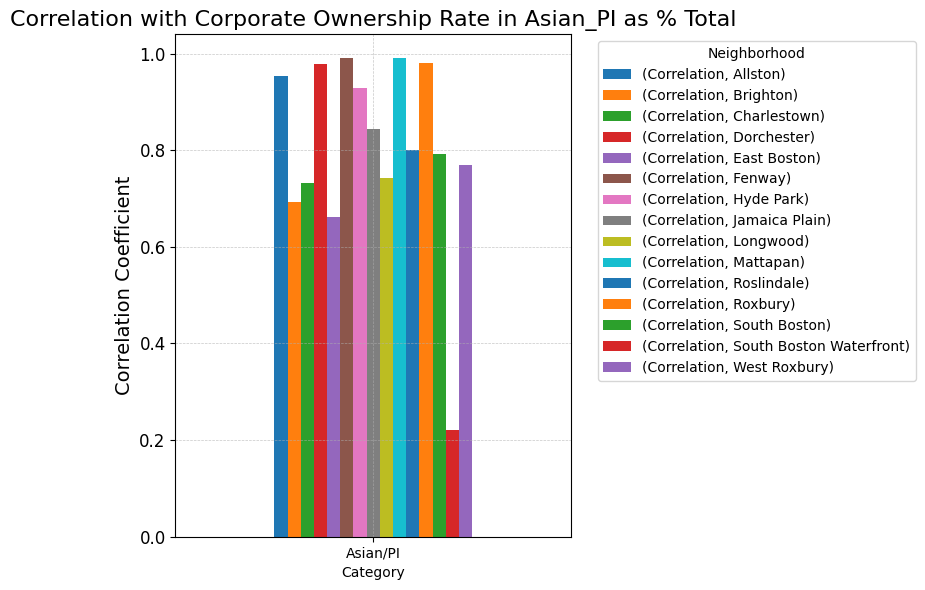

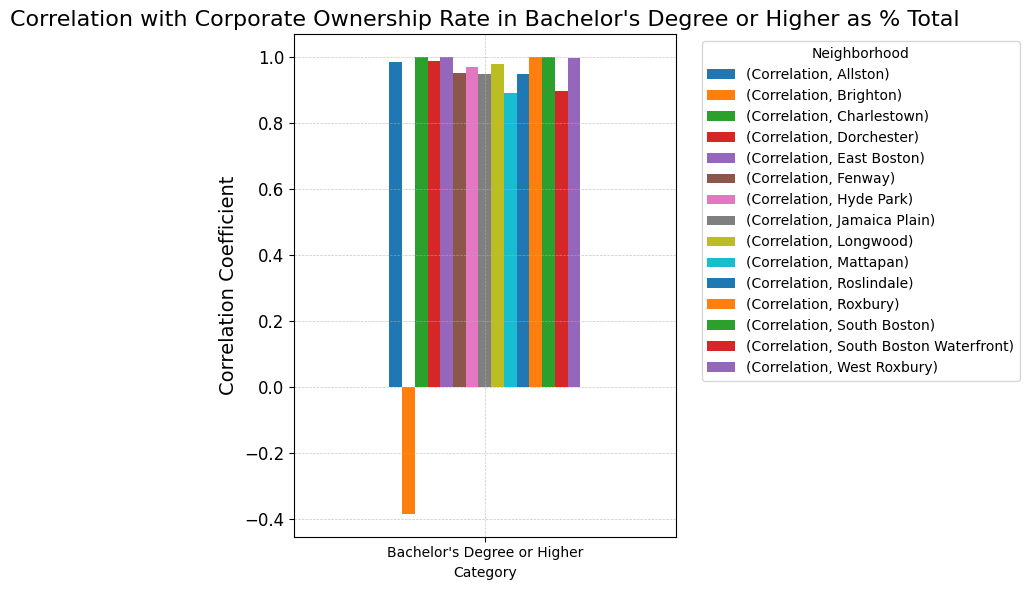

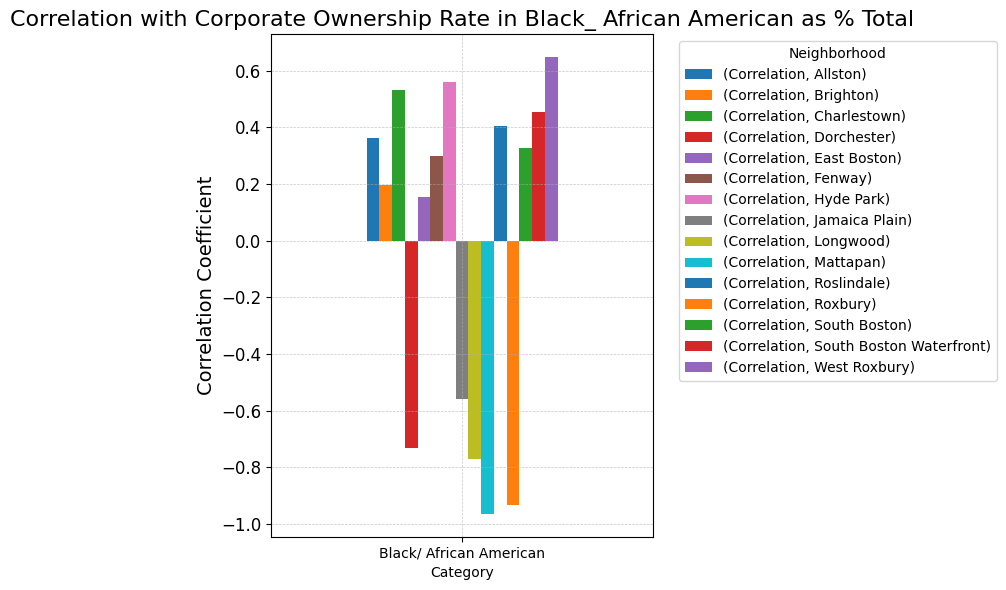

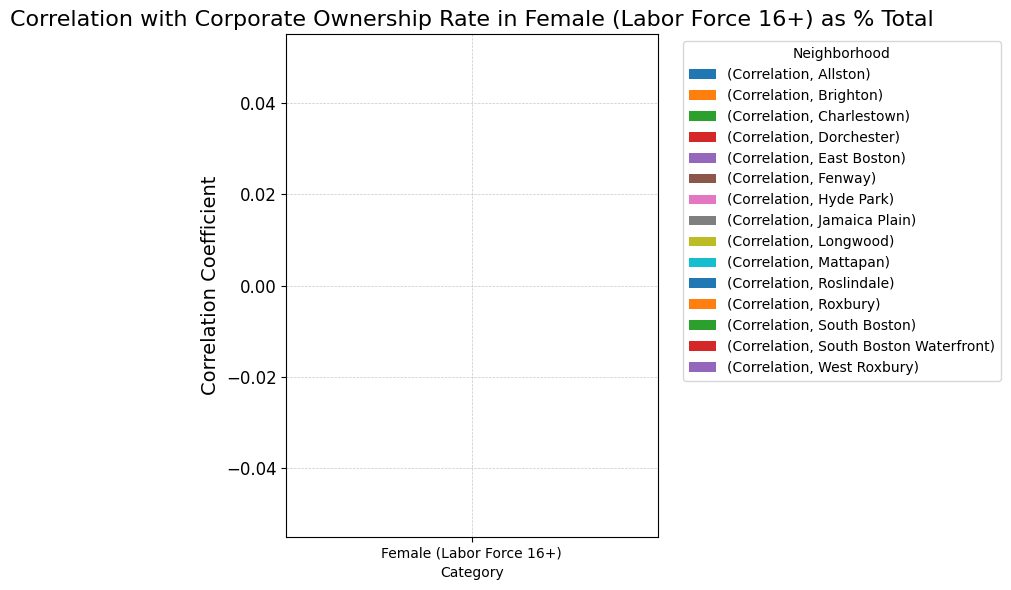

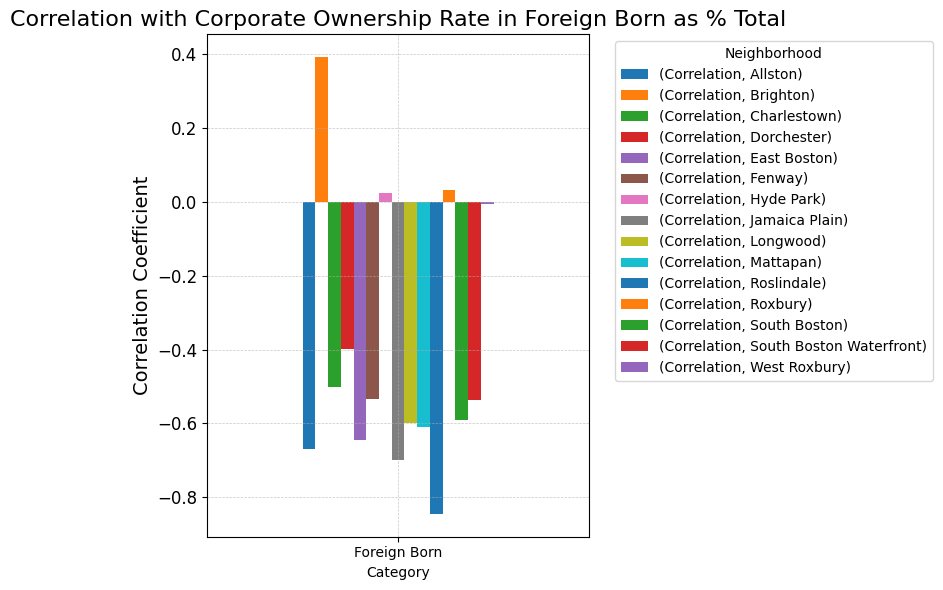

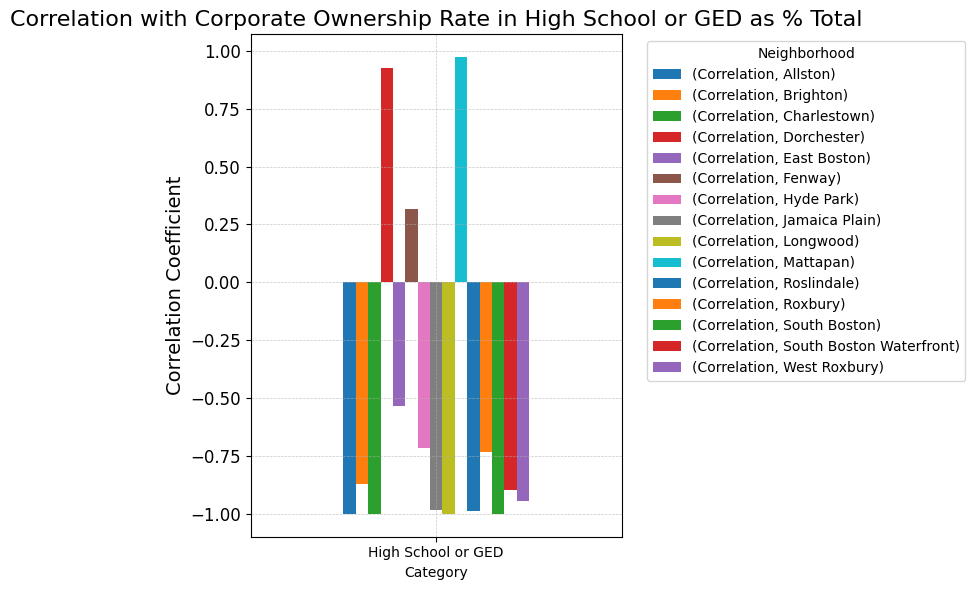

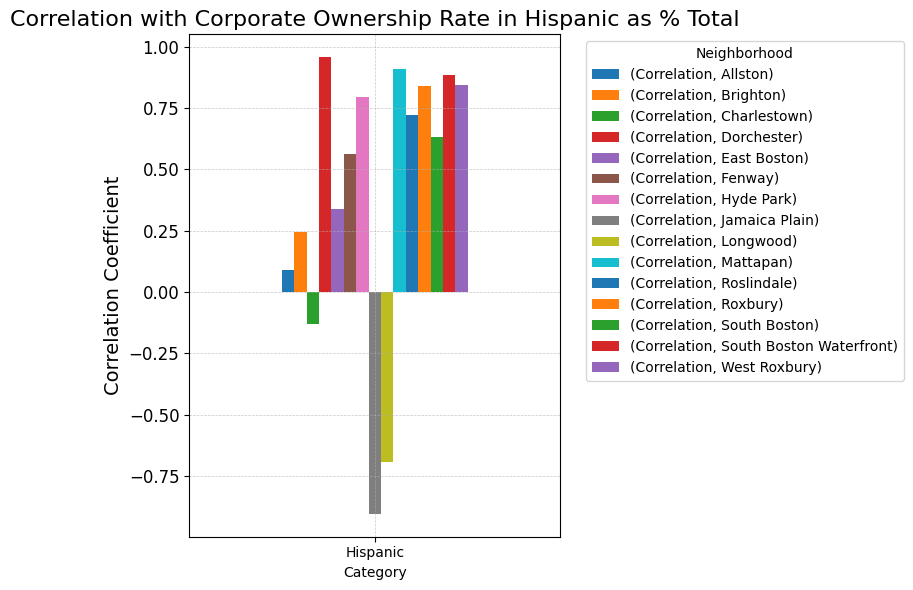

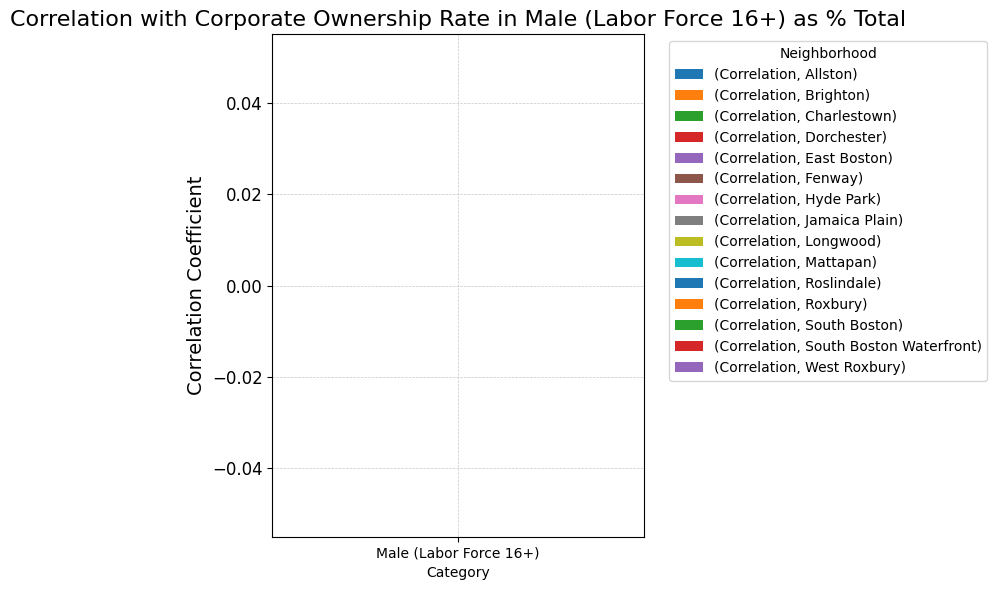

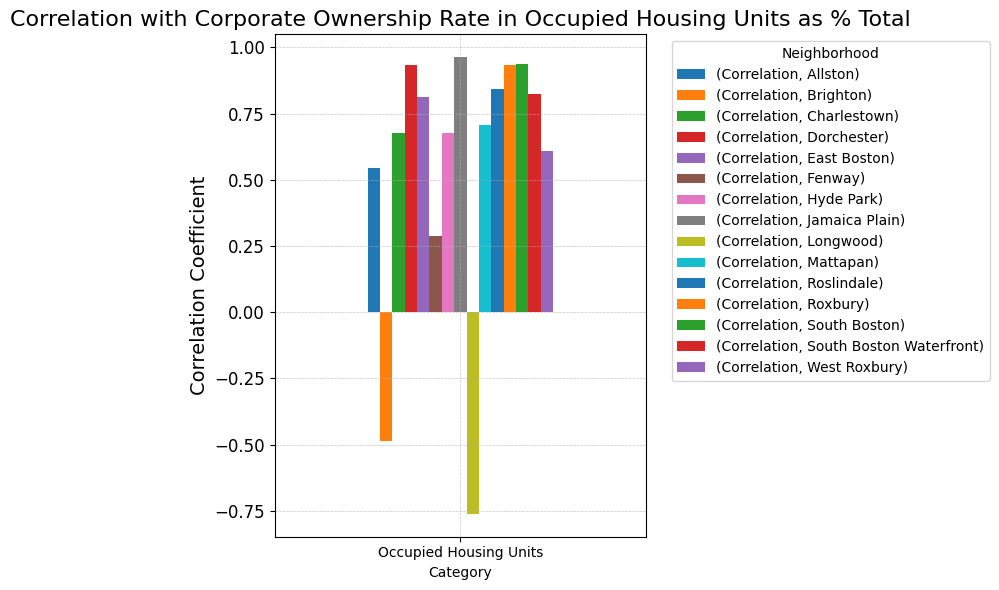

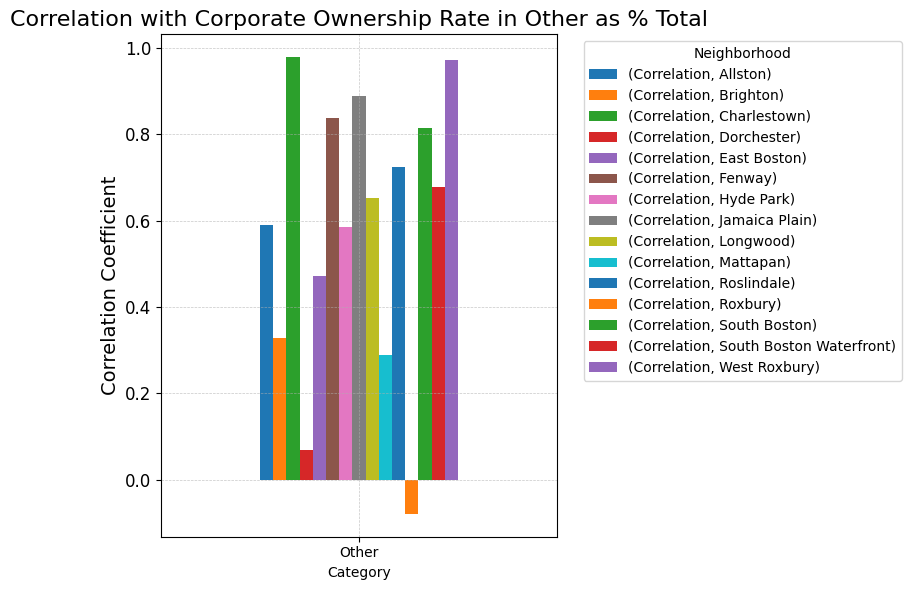

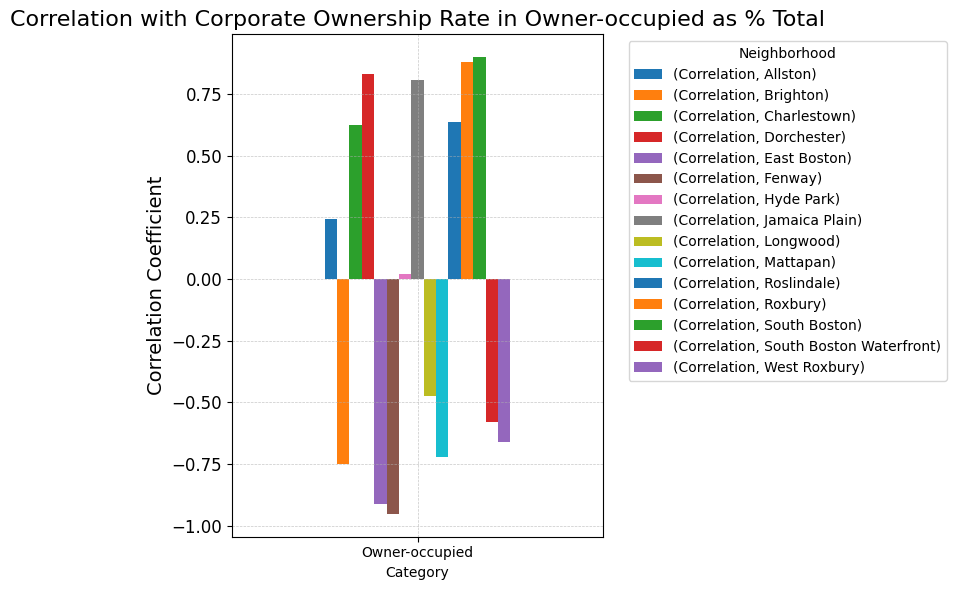

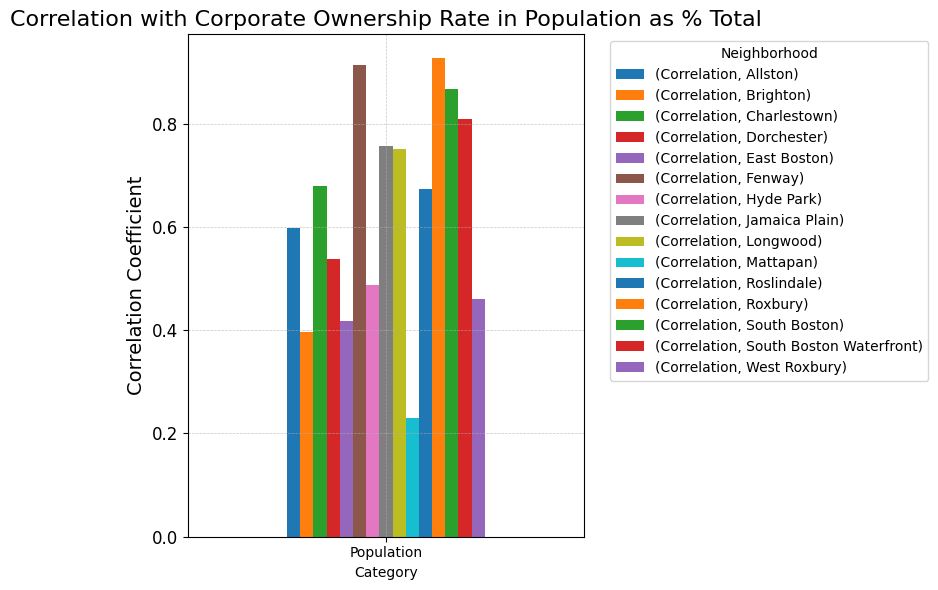

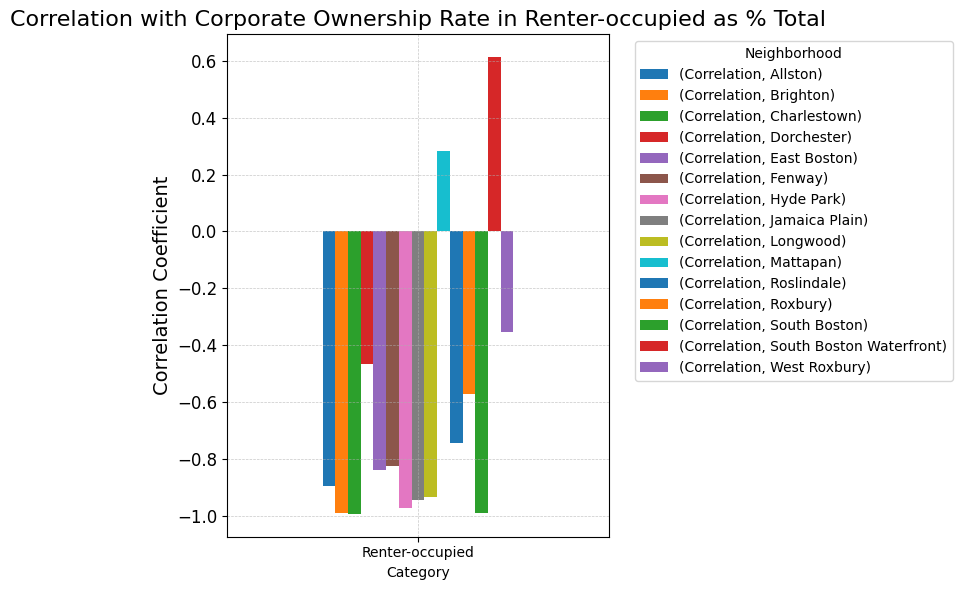

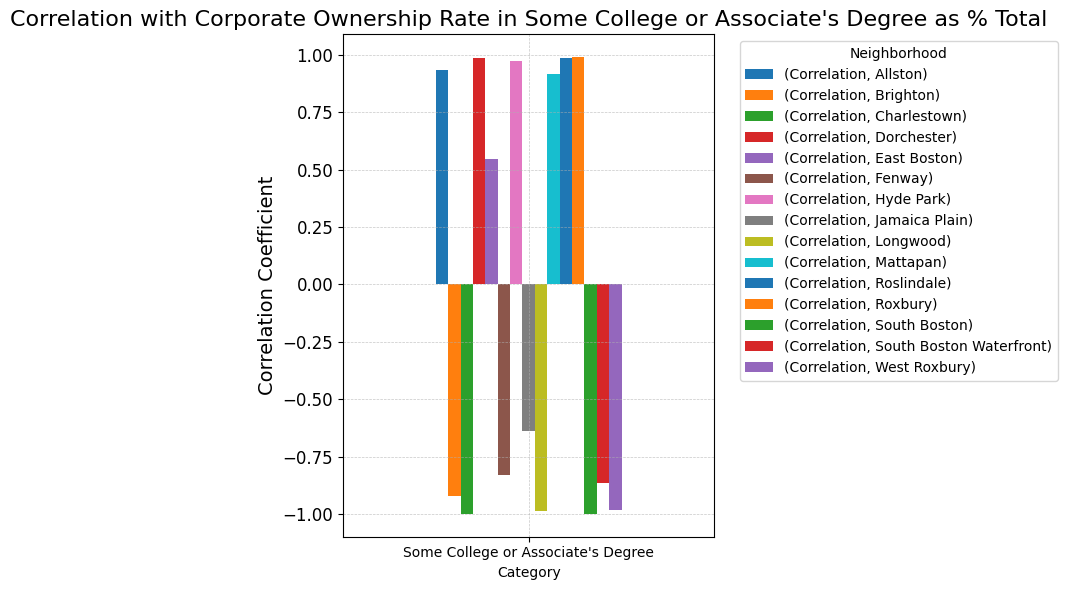

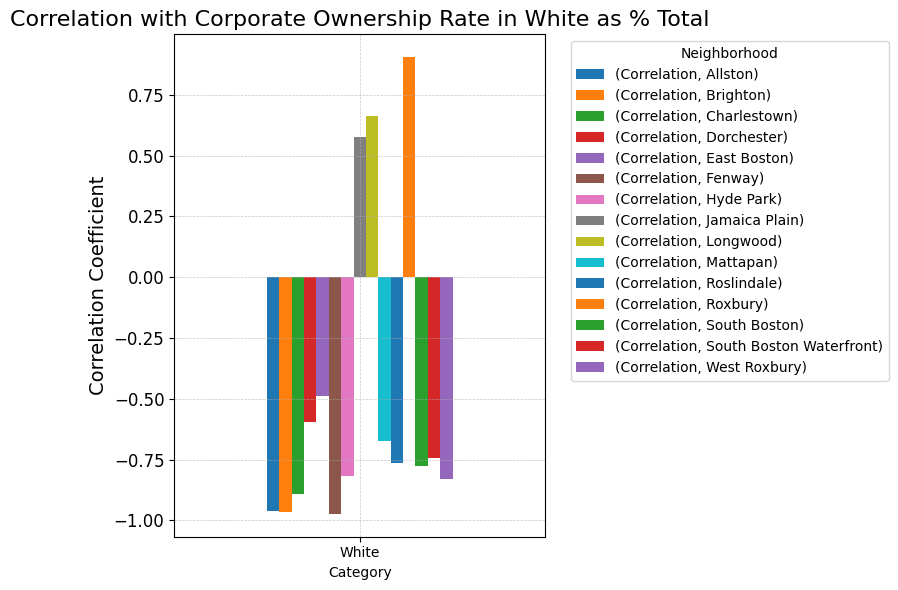

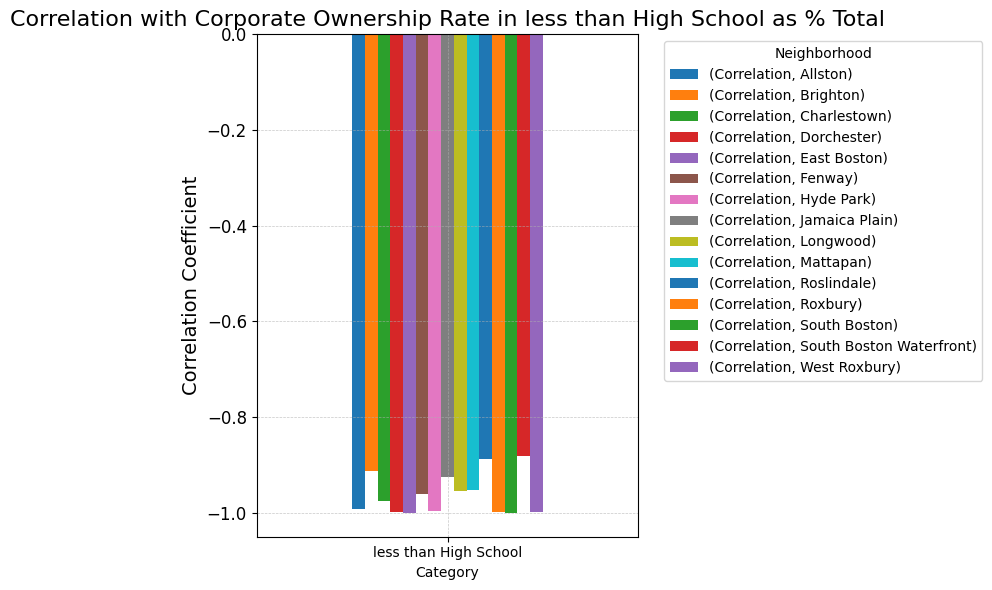

In [28]:
for feature, values in correlation_df.groupby(level=0):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    values.unstack().plot(kind='bar', ax=ax)
    
    # Customize the plot
    title = f'Correlation with Corporate Ownership Rate in {feature} as % Total'
    title = title.replace("/", "_")
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.tick_params(axis='x', labelsize=10, rotation=0)  # Make x-axis labels horizontal
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Place the legend outside of the figure/plot
    ax.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the padding to make room for the legend
    plt.savefig(title)

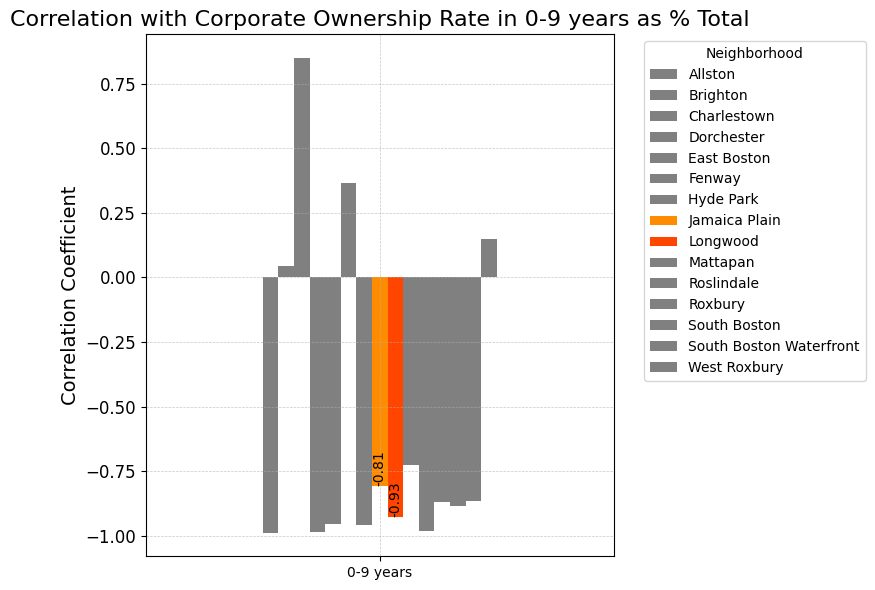

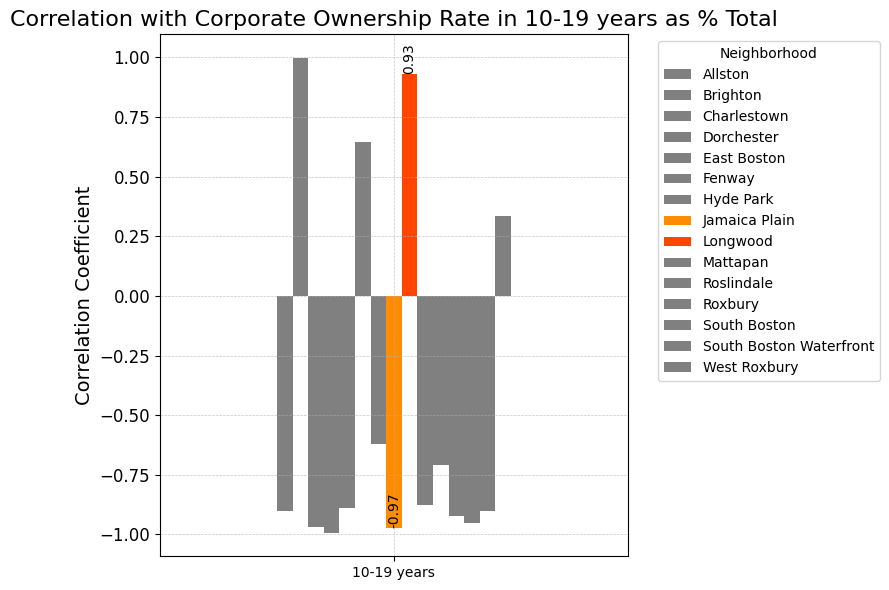

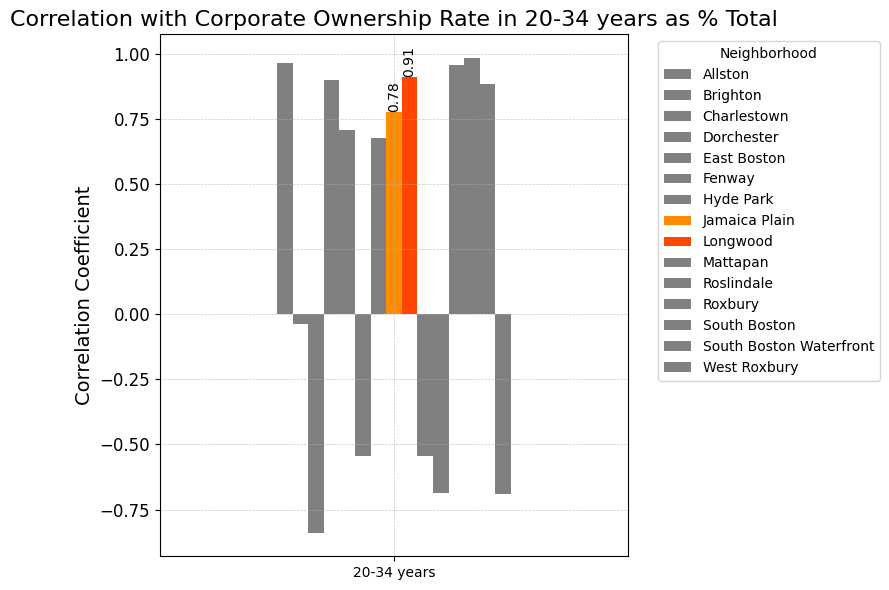

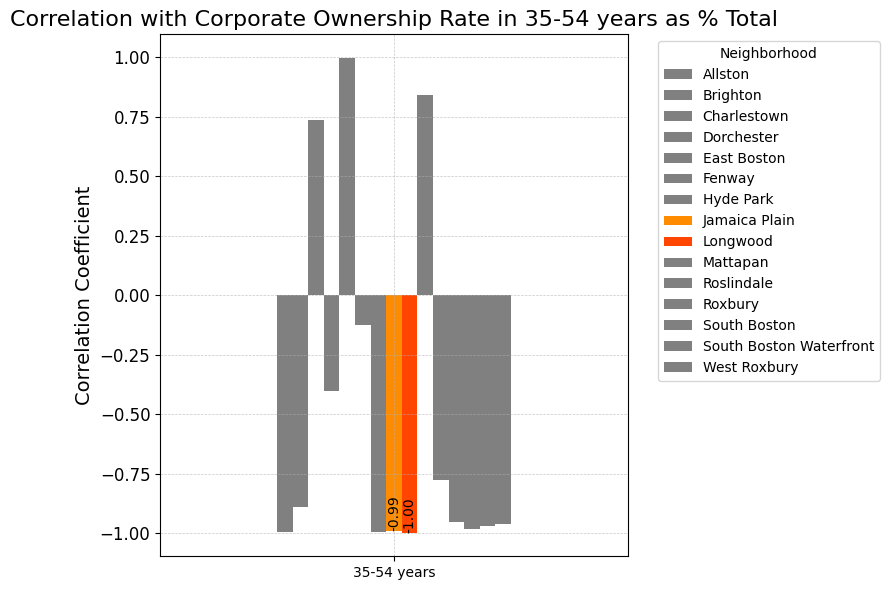

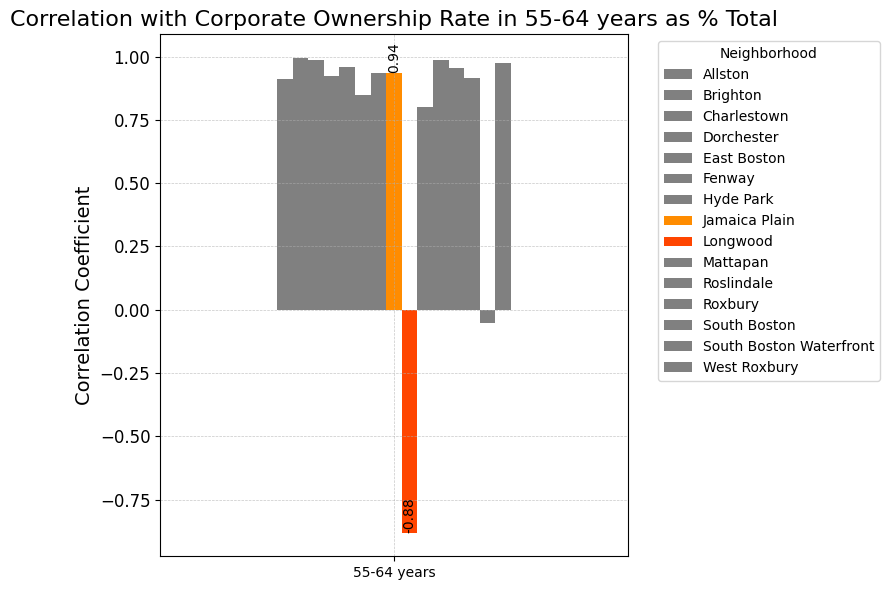

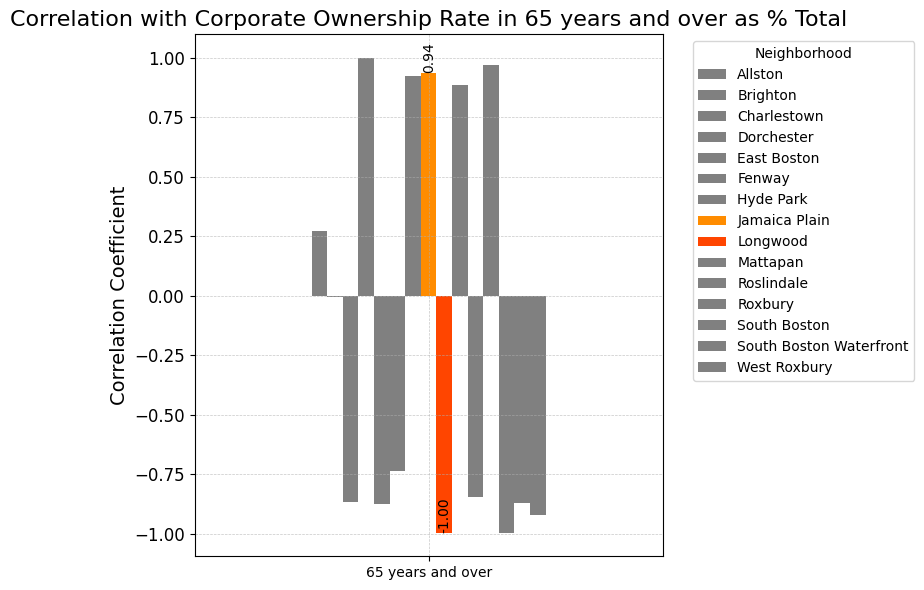

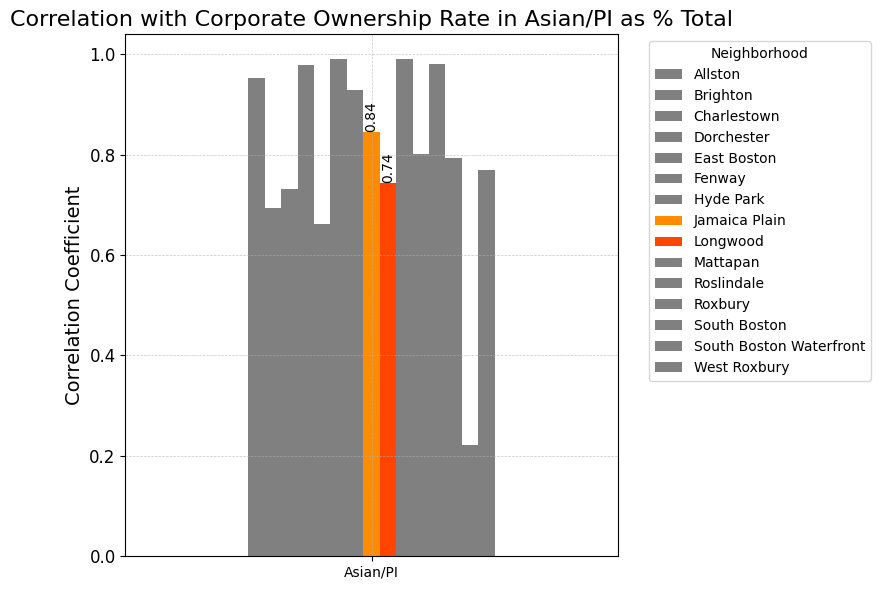

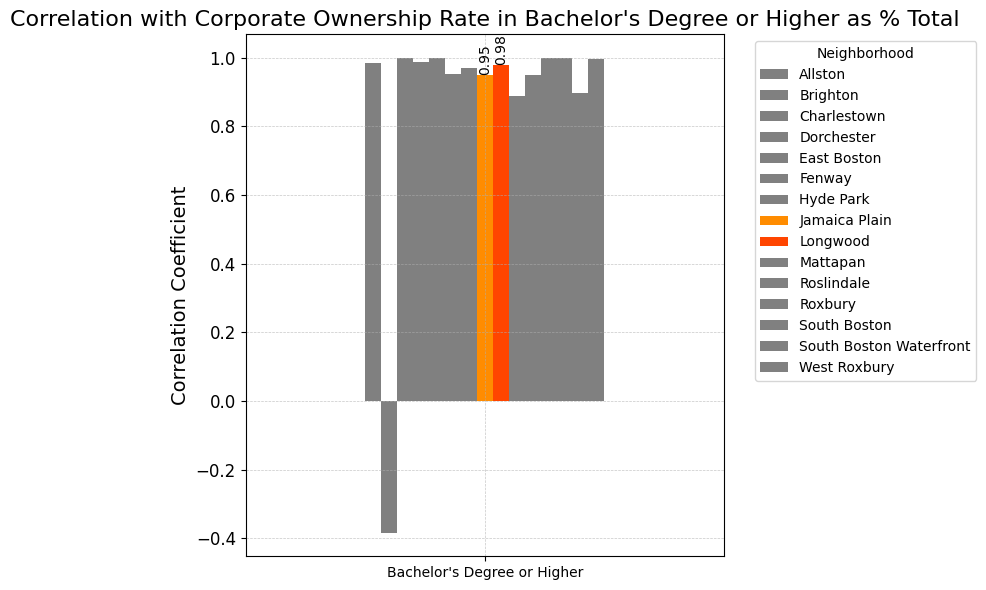

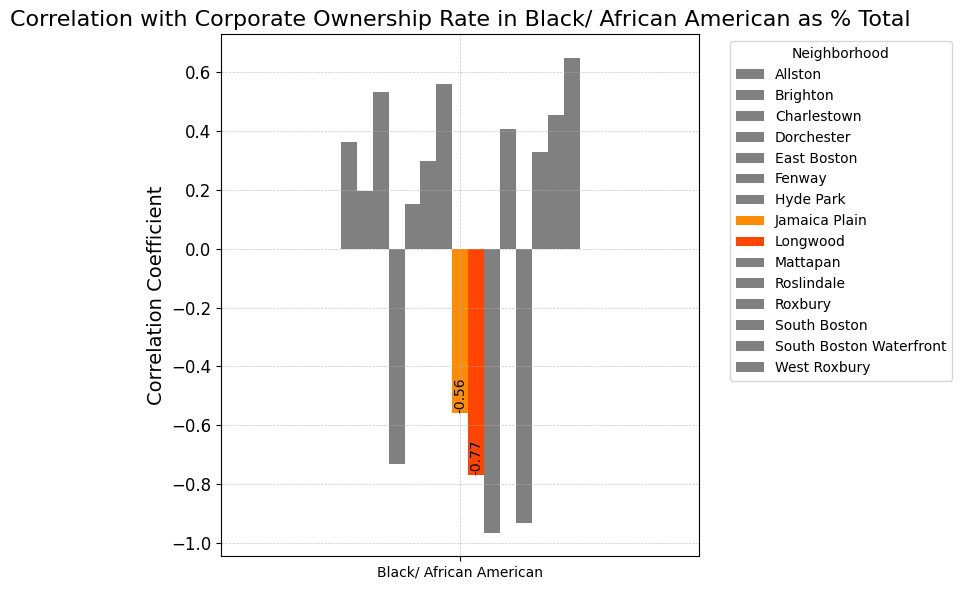

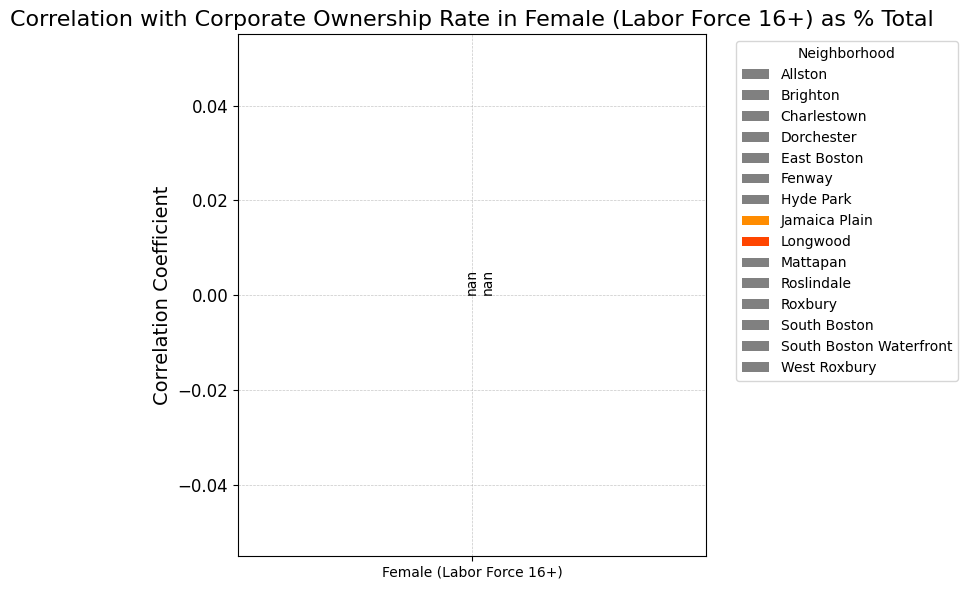

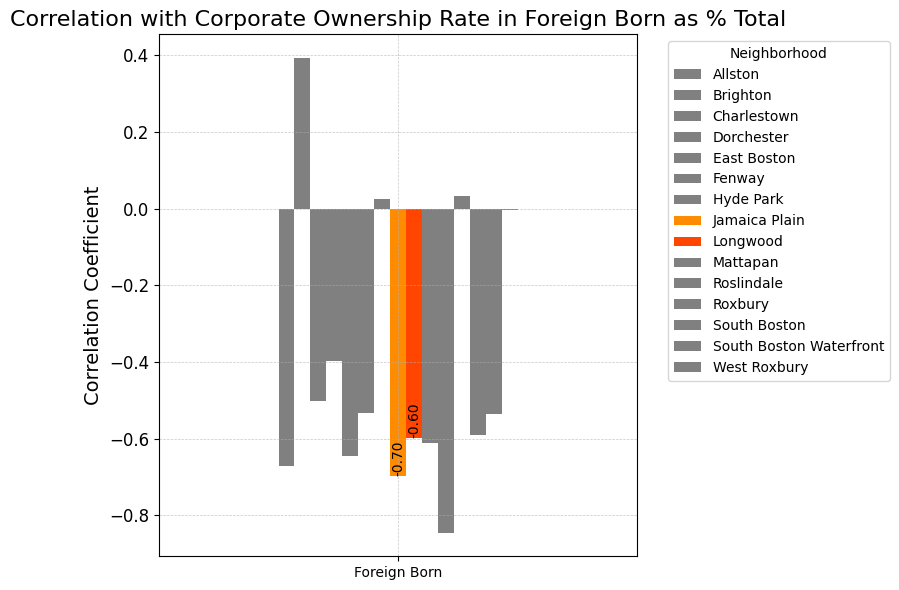

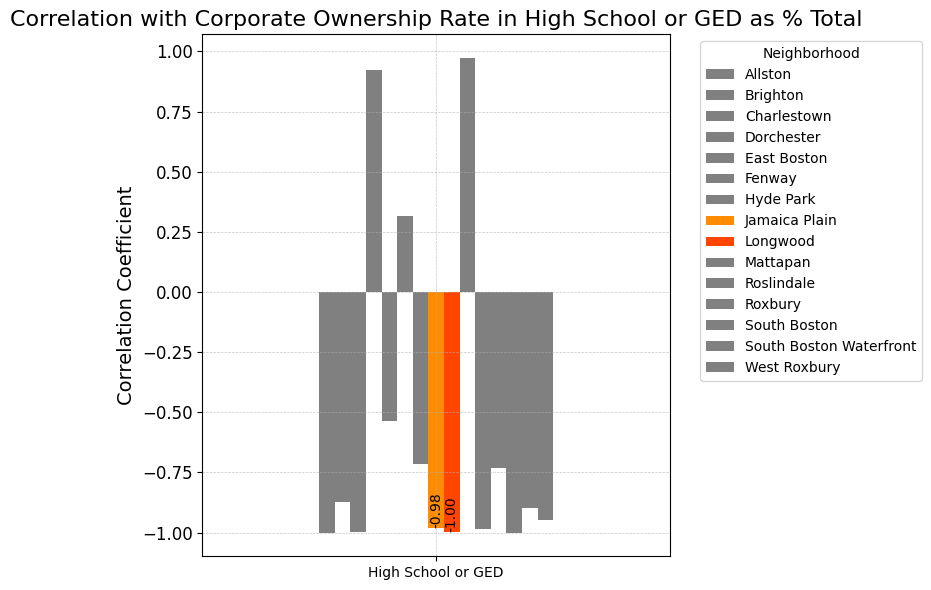

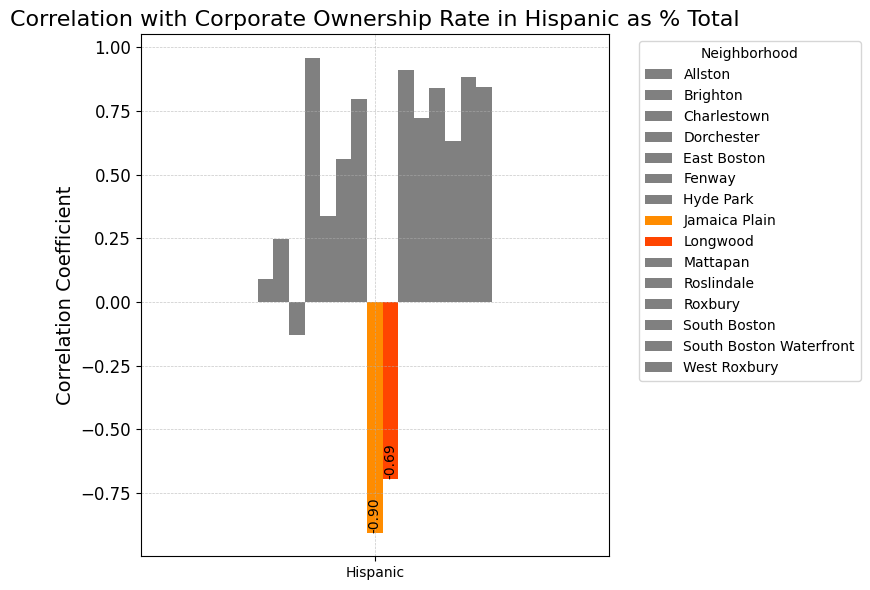

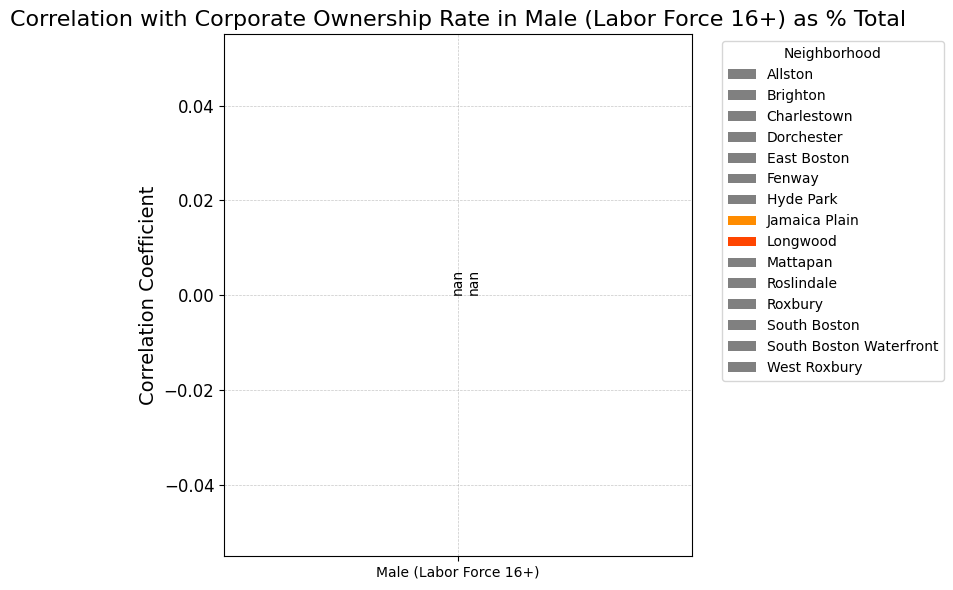

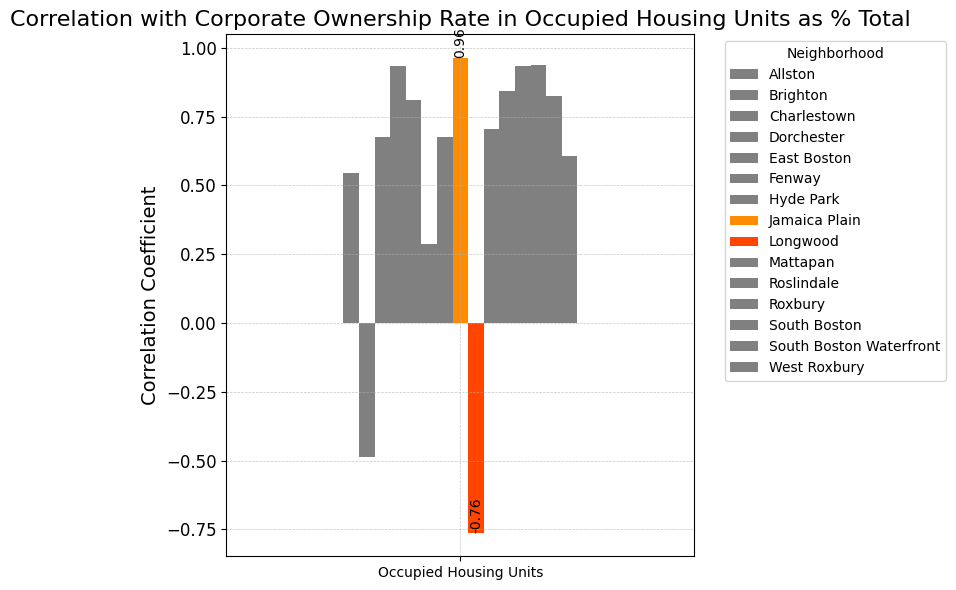

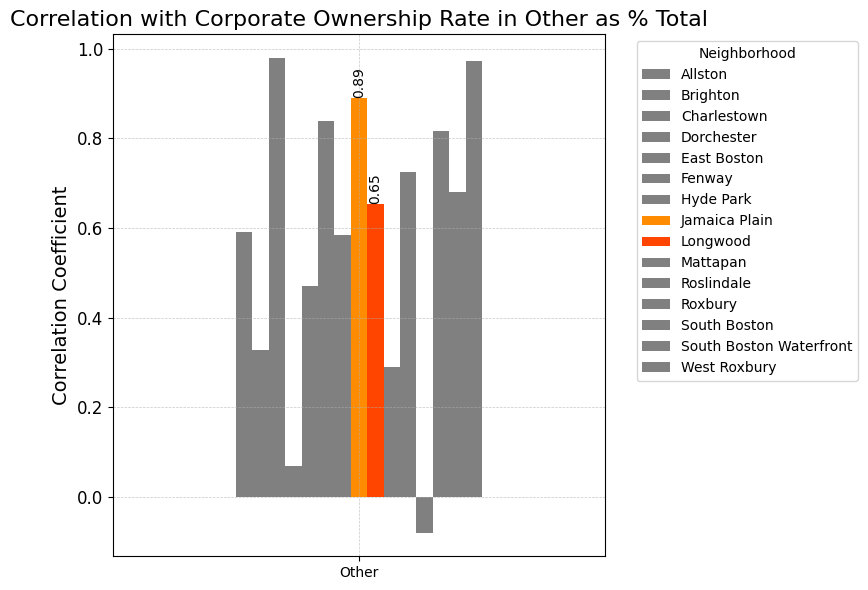

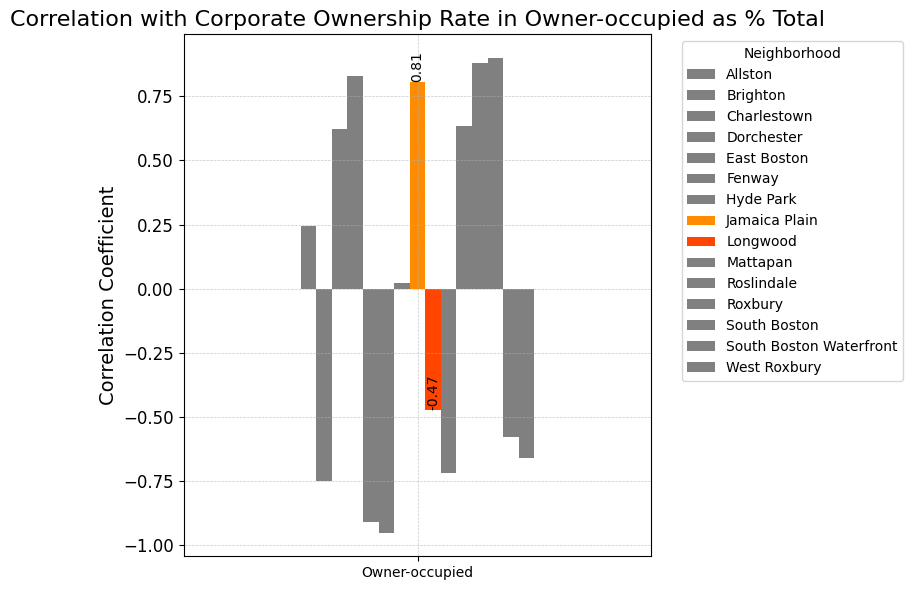

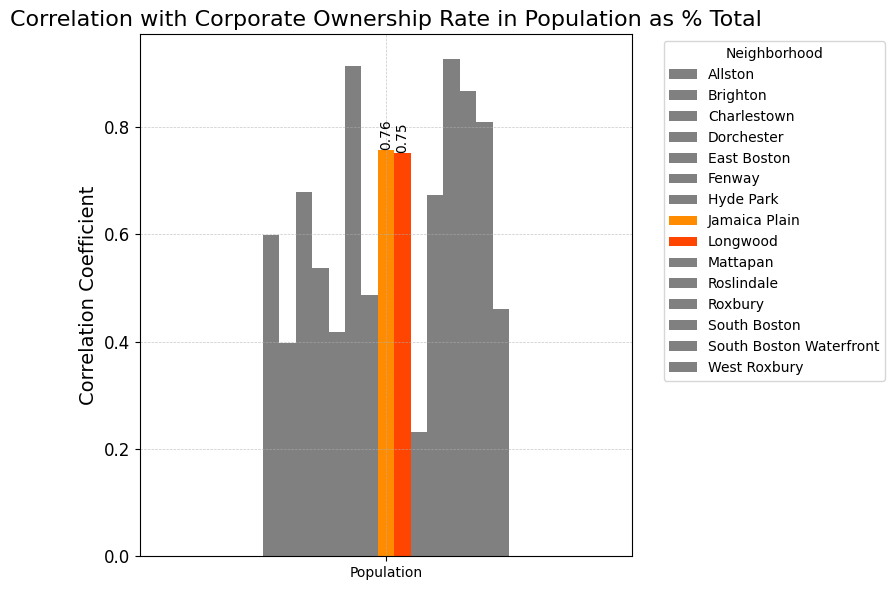

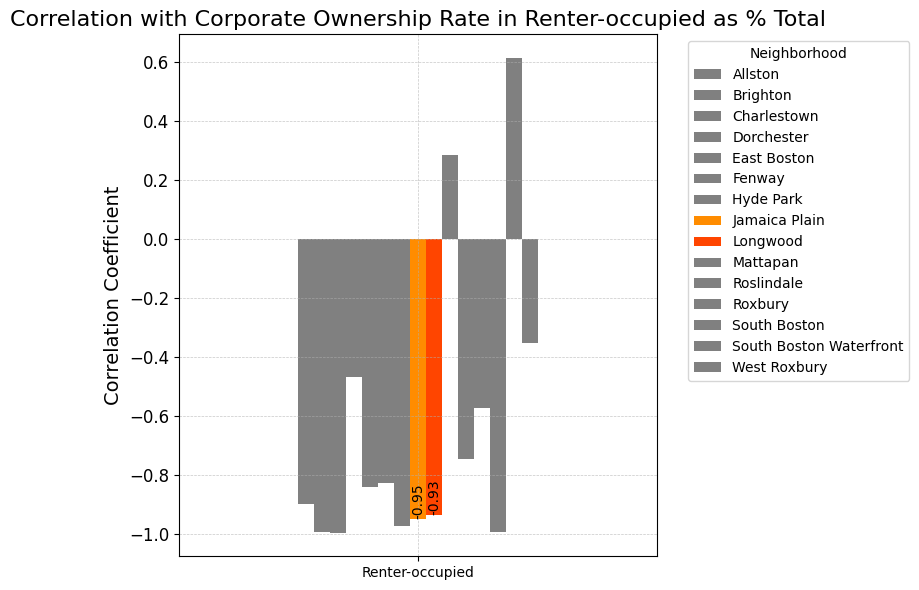

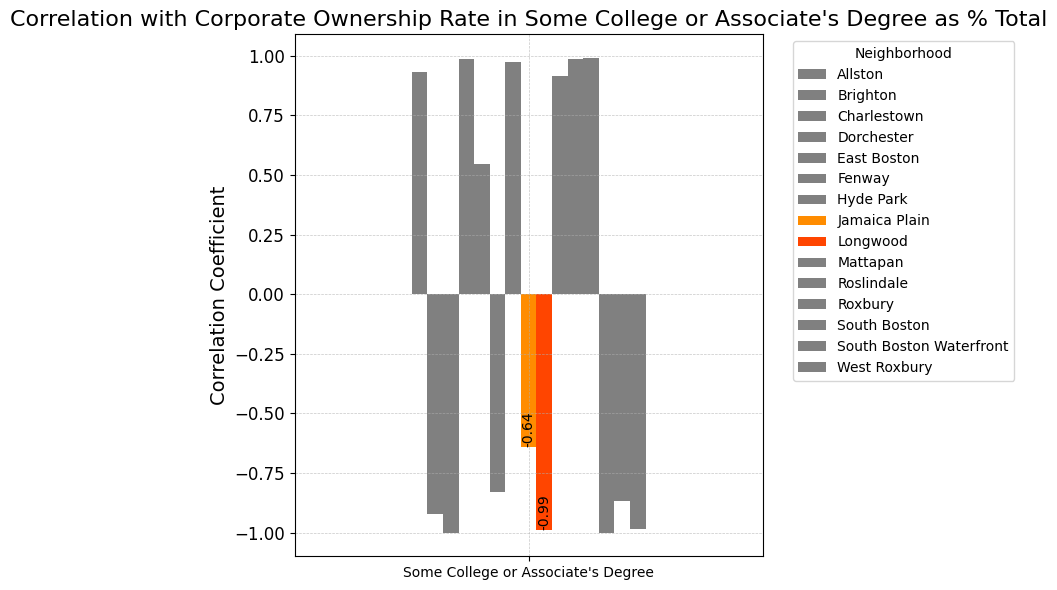

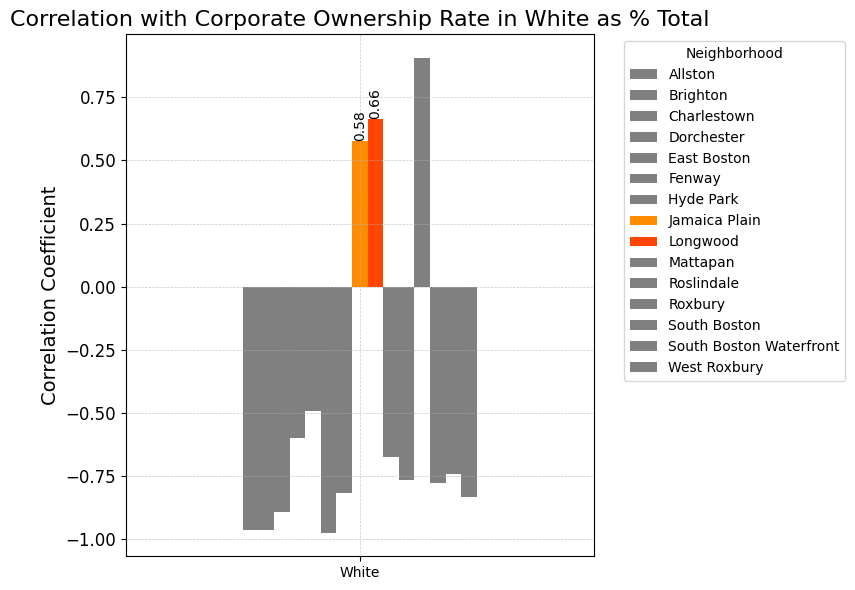

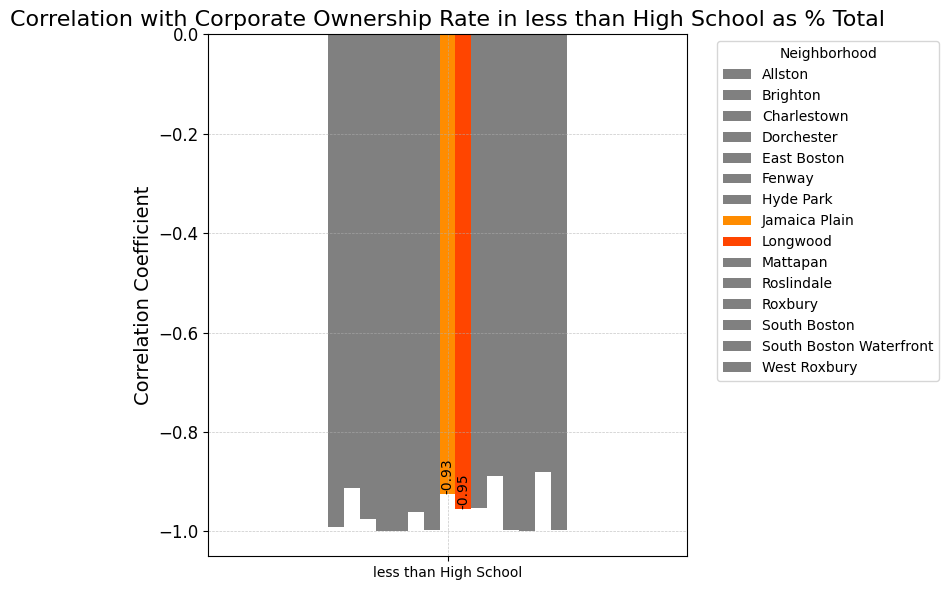

In [48]:
for feature, values in correlation_df.groupby(level=0):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    values = values.unstack()
    
    # Create a color list, where 'Longwood' is red, 'Jamaica Plain' is dark red or pink, and others are grey
    colors = ['orangered' if x == 'Longwood' else 'darkorange' if x == 'Jamaica Plain' else 'grey' for x in values.columns.get_level_values('Neighborhood').tolist()]
    
    # Plotting the bars
    bars = values.plot(kind='bar', ax=ax, color=colors)
    
    # Customize the plot
    ax.set_title(f'Correlation with Corporate Ownership Rate in {feature} as % Total', fontsize=16)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.set_xlabel('')  # Remove the x-axis label
    ax.tick_params(axis='x', labelsize=10, rotation=0)  # Make x-axis labels horizontal
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Loop through the bars and add vertical labels for 'Jamaica Plain' and 'Longwood'
    for bar, label, value in zip(ax.patches, values.columns.get_level_values('Neighborhood').tolist(), values.iloc[0]):
        if label in ['Jamaica Plain', 'Longwood']:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
                    ha='center', va='bottom', color='black', fontsize=10, rotation=90)  # Vertical text
    
    # Extracting the current handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # Only taking the neighborhood name as the label (ignoring 'Correlation')
    new_labels = [label.split(', ')[1].strip(')') for label in labels]
    
    # Place the legend outside of the figure/plot with updated labels
    ax.legend(handles, new_labels, title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the padding to make room for the legend
    plt.show()

    # Save the figure as PNG with a specific DPI for consistent resolution
    feature_cleaned = feature.replace("/", "_")
    fig.savefig(f'{feature_cleaned}_Longwood_Jamaica.png', dpi=300, bbox_inches='tight')

: 